# Omphemetse Mangope 

Student No: 201532614    
AML    
Assignment 05: L2 regularized Polynomial Regression    
Due Date: 12 June 2020

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Design matrix function

In [288]:
def designMatrix(x):
    n = len(x)
    X = np.c_[np.ones(n), x, x**2, x**3, x**4,x**5, x**6] # drafting a polynomial of degree 6
    return(X) # returns design matrix

# L2 regularization

In [289]:
def L2_regularization(X, Y, λ):
    I = np.eye(7) # We take to be 7 because we have a polynomial of 7 term but the degree 6 
    I[0,0] = 0 # We make the first term to 0, because  
    theta = np.linalg.inv((X.T.dot(X) + λ * I)).dot(X.T).dot(Y) # ridge regression 
    return(theta) # returns theta

# Data 

In [290]:
#λ = np.linspace(0, 400,200)
#λ = 23
x = scale(np.linspace(0, 400,200)) # data generation
x = designMatrix(x) # feed generated data to design matrix 

y = scale(np.linspace(0, 400, 200)) # y value

# Cross-Valiation

In [291]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=.25) # Cross validation

In [292]:
θ = L2_regularization(x_train, y_train, λ) #equate ridge regression to theta since it estimates theta vaues

In [293]:
Epochs = 1500


def MSE(x_test,y_test,θ,Epochs):
    costs = []
    λ_values = []
    
   # λ = np.linspace(0,400,200)
    MSE = 0
   
    n = len(x_test)
    
    for λ in np.linspace(0,400,200):
        
        # 
        for i in range(n):
            y_pred = θ[0] + θ[1]*x_test + θ[2]*x_test**2 + θ[3]*x_test**3 + θ[4]*x_test**4 + θ[5]*x_test**5 + θ[6]*x_test**6
            MSE += (y_test[i] - y_pred) ** 2
            costs.append(MSE)
            Lambda = MSE + λ * sum(θ)**2
            λ_values.append(Lambda)
            
    
    return(MSE,Lambda) 

# Finding optimal values of lambda and MSEs

In [294]:
MSE_test,Lambda_test = MSE(x_test,y_test,θ,Epochs)
MSE_test = MSE_test[-1]
Lambda_test = Lambda_test[-1]
Lambda_max = max(MSE_test) 
Lambda_min_max_test = min(MSE_test),max(MSE_test)


MSE_train, Lambda_train = MSE(x_train,y_train,θ,Epochs)
MSE_train = MSE_train[-1]
Lambda_train = Lambda_train[-1]
Lambda_max = max(MSE_train)
Lambda_min_max_train = min(MSE_train),max(MSE_train)

# Plotting lambda against MSE

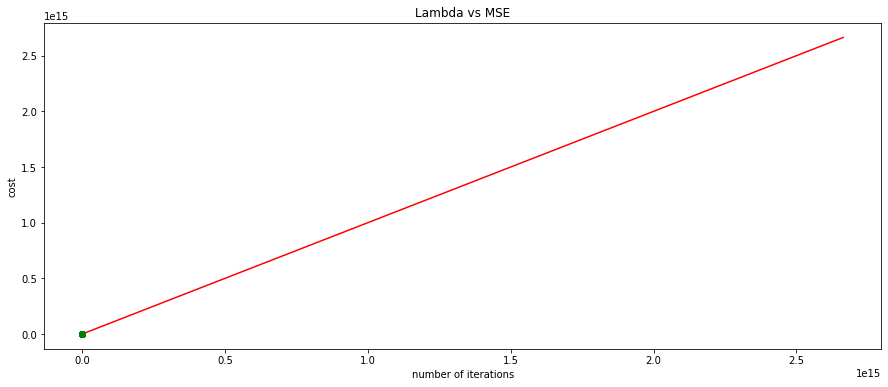

In [303]:
plt.figure(figsize=(15,6))
plt.title('Lambda vs MSE')
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.plot(Lambda_test, MSE_test,'-',color='r')
plt.plot(Lambda_train, MSE_train,'*', color='b')
plt.plot(x,y,'o', color='g')
plt.show()